# dataset

In [ ]:
# https://www.kaggle.com/datasets/uciml/mushroom-classification

# Import Library

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

# skip warning
from sklearn import preprocessing
import warnings
warnings.filterwarnings( action= 'ignore')

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/essex_university/drug_classification/drug200.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
# df['class'].unique().tolist()

list_column = df.columns.tolist()
for i in range(len(list_column)):
  print(list_column[i],df[f'{list_column[i]}'].unique().tolist())

Age [23, 47, 28, 61, 22, 49, 41, 60, 43, 34, 74, 50, 16, 69, 32, 57, 63, 48, 33, 31, 39, 45, 18, 65, 53, 46, 15, 73, 58, 66, 37, 68, 67, 62, 24, 26, 40, 38, 29, 17, 54, 70, 36, 19, 64, 59, 51, 42, 56, 20, 72, 35, 52, 55, 30, 21, 25]
Sex ['F', 'M']
BP ['HIGH', 'LOW', 'NORMAL']
Cholesterol ['HIGH', 'NORMAL']
Na_to_K [25.355, 13.093, 10.114, 7.798, 18.043, 8.607, 16.275, 11.037, 15.171, 19.368, 11.767, 19.199, 15.376, 20.942, 12.703, 15.516, 11.455, 13.972, 7.298, 25.974, 19.128, 25.917, 30.568, 15.036, 33.486, 18.809, 30.366, 9.381, 22.697, 17.951, 8.75, 9.567, 11.014, 31.876, 14.133, 7.285, 9.445, 13.938, 9.709, 9.084, 19.221, 14.239, 15.79, 12.26, 12.295, 8.107, 13.091, 10.291, 31.686, 19.796, 19.416, 10.898, 27.183, 18.457, 10.189, 14.16, 11.34, 27.826, 10.091, 18.703, 29.875, 9.475, 20.693, 8.37, 13.303, 27.05, 12.856, 10.832, 24.658, 24.276, 13.967, 19.675, 10.605, 22.905, 17.069, 20.909, 11.198, 19.161, 13.313, 10.84, 13.934, 7.761, 9.712, 11.326, 10.067, 13.935, 13.597, 15.478, 23

# Data Preprocessing

In [ ]:
# 1 Quantitative variable clean
df = pd.get_dummies(df, columns=['BP','Cholesterol'])
df

,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,F,25.355,DrugY,1,0,0,1,0
1,47,M,13.093,drugC,0,1,0,1,0
2,47,M,10.114,drugC,0,1,0,1,0
3,28,F,7.798,drugX,0,0,1,1,0
4,61,F,18.043,DrugY,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,F,11.567,drugC,0,1,0,1,0
196,16,M,12.006,drugC,0,1,0,1,0
197,52,M,9.894,drugX,0,0,1,1,0
198,23,M,14.020,drugX,0,0,1,0,1


In [ ]:
# 2 Qualitative variable clean
df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1})
df['Drug'] = df['Drug'].replace({'drugA':0,'drugB':1,'drugC':2,'drugX':3,'DrugY':4})
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    int64  
 1   Sex                 200 non-null    int64  
 2   Na_to_K             200 non-null    float64
 3   Drug                200 non-null    int64  
 4   BP_HIGH             200 non-null    uint8  
 5   BP_LOW              200 non-null    uint8  
 6   BP_NORMAL           200 non-null    uint8  
 7   Cholesterol_HIGH    200 non-null    uint8  
 8   Cholesterol_NORMAL  200 non-null    uint8  
dtypes: float64(1), int64(3), uint8(5)
memory usage: 7.4 KB


,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0,25.355,4,1,0,0,1,0
1,47,1,13.093,2,0,1,0,1,0
2,47,1,10.114,2,0,1,0,1,0
3,28,0,7.798,3,0,0,1,1,0
4,61,0,18.043,4,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,0,11.567,2,0,1,0,1,0
196,16,1,12.006,2,0,1,0,1,0
197,52,1,9.894,3,0,0,1,1,0
198,23,1,14.020,3,0,0,1,0,1


# EDA

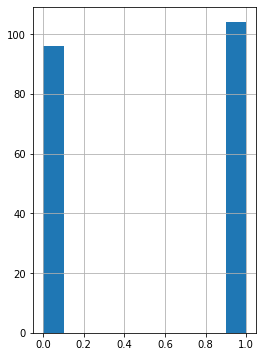

In [ ]:
plt.figure(figsize=(4,6))
df["Sex"].hist()   

In [ ]:
# hist
# histplot
# heatmap
# box plot

# Feature Engineering

In [ ]:
# delete outlier because in box plot
OutlierFactor = LocalOutlierFactor()
predict_outlier = OutlierFactor.fit_predict(df)
df['check_outlier'] = predict_outlier.tolist()
df = df[df['check_outlier'] == 1].reset_index(drop=True).drop(['check_outlier'], axis=1)
df

,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0,25.355,4,1,0,0,1,0
1,47,1,13.093,2,0,1,0,1,0
2,47,1,10.114,2,0,1,0,1,0
3,28,0,7.798,3,0,0,1,1,0
4,61,0,18.043,4,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
194,56,0,11.567,2,0,1,0,1,0
195,16,1,12.006,2,0,1,0,1,0
196,52,1,9.894,3,0,0,1,1,0
197,23,1,14.020,3,0,0,1,0,1


# train_test_split

In [ ]:
# train test split to protect data overfitting
features = ["Age","Sex","Na_to_K","BP_HIGH","BP_LOW","BP_NORMAL","Cholesterol_HIGH","Cholesterol_NORMAL"]
X = df.loc[:, features].to_numpy()
y = df.loc[:, 'Drug'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((159, 8), (40, 8), (159,), (40,))

In [ ]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.fit_transform(X_test)

# SVM

mean = 0.8683333333333334
std = 0.09004628439493399
accuracy_score =  0.875
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.40      1.00      0.57         2
           2       1.00      1.00      1.00         4
           3       0.80      1.00      0.89         8
           4       1.00      0.84      0.91        19

    accuracy                           0.88        40
   macro avg       0.84      0.91      0.84        40
weighted avg       0.93      0.88      0.89        40



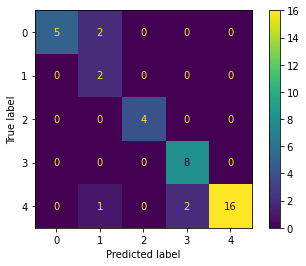

In [ ]:
# default_parameter
svm_model = SVC()
kfold = model_selection.KFold(n_splits=10)
cv = model_selection.cross_val_score(svm_model, X_train_scalar, y_train, cv=kfold)
cv_mean = cv.mean()
cv_std = cv.std()
print('mean =',cv_mean)
print('std =',cv_std)
svm_model.fit(X_train_scalar, y_train)
y_pred_model =svm_model.predict(X_test_scalar)
print('accuracy_score = ',accuracy_score(y_test, y_pred_model))
print(classification_report(y_test, y_pred_model))
plot_confusion_matrix(svm_model, X_test_scalar, y_test)
plt.show()

In [1]:
# find_best_parameter
svm_model = SVC()
svm_parameter = {
  'gamma': ['scale','auto'],
  'verbose':[True,False],
  'probability':[True,False],
  'shrinking':[True,False],
  'break_ties':[True,False],
  'decision_function_shape': ['ovo','ovr'],
}

clf = GridSearchCV(svm_model, svm_parameter)
clf.fit(X_train_scalar, y_train)
print("\nbest_score = ",clf.best_score_)
print("best_params = ",clf.best_params_)

NameError: ignored

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]mean = 0.8745833333333334
std = 0.09242959031969507
[LibSVM]accuracy_score =  0.875
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.40      1.00      0.57         2
           2       1.00      1.00      1.00         4
           3       0.80      1.00      0.89         8
           4       1.00      0.84      0.91        19

    accuracy                           0.88        40
   macro avg       0.84      0.91      0.84        40
weighted avg       0.93      0.88      0.89        40



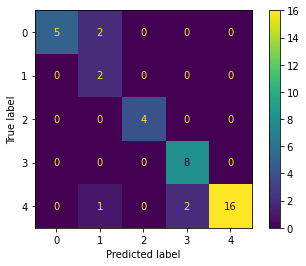

In [ ]:
# tuning_parameter
svm_model = SVC(verbose = True, probability = True, shrinking = True,break_ties = True)
kfold = model_selection.KFold(n_splits=10)
cv = model_selection.cross_val_score(svm_model, X_train_scalar, y_train, cv=kfold)
cv_mean = cv.mean()
cv_std = cv.std()
print('mean =',cv_mean)
print('std =',cv_std)
svm_model.fit(X_train_scalar, y_train)
y_pred_model =svm_model.predict(X_test_scalar)
print('accuracy_score = ',accuracy_score(y_test, y_pred_model))
print(classification_report(y_test, y_pred_model))
plot_confusion_matrix(svm_model, X_test_scalar, y_test)
plt.show()

# LogisticRegression

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]mean = 0.8745833333333334
std = 0.09242959031969507
[LibSVM]accuracy_score =  0.875
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.40      1.00      0.57         2
           2       1.00      1.00      1.00         4
           3       0.80      1.00      0.89         8
           4       1.00      0.84      0.91        19

    accuracy                           0.88        40
   macro avg       0.84      0.91      0.84        40
weighted avg       0.93      0.88      0.89        40



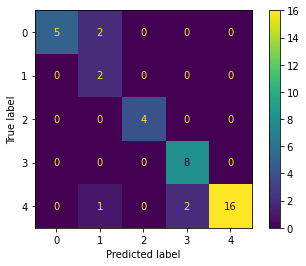

In [ ]:
# default parameter
logistic_regrssion_model = LogisticRegression()
kfold = model_selection.KFold(n_splits=10)
cv = model_selection.cross_val_score(svm_model, X_train_scalar, y_train, cv=kfold)
cv_mean = cv.mean()
cv_std = cv.std()
print('mean =',cv_mean)
print('std =',cv_std)
svm_model.fit(X_train_scalar, y_train)
y_pred_model =svm_model.predict(X_test_scalar)
print('accuracy_score = ',accuracy_score(y_test, y_pred_model))
print(classification_report(y_test, y_pred_model))
plot_confusion_matrix(svm_model, X_test_scalar, y_test)
plt.show()

In [ ]:
# find_best_parameter
logistic_regression_model = LogisticRegression()
logistic_regression_parameter = {
    'penalty': ['elasticnet','none','l1','l2'],
    'max_iter': [100,200,400,1600],
    'solver': ['newton-cg', 'lbfgs'],
}

clf = GridSearchCV(logistic_regression_model, logistic_regression_parameter)
clf.fit(X_train_scalar, y_train)
print("\nbest_score = ",clf.best_score_)
print("best_params = ",clf.best_params_)


best_score =  0.94375
best_params =  {'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


mean = 0.9433333333333334
std = 0.05901977069875258
accuracy_score =  0.925
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         4
           3       0.89      1.00      0.94         8
           4       1.00      0.89      0.94        19

    accuracy                           0.93        40
   macro avg       0.88      0.95      0.90        40
weighted avg       0.95      0.93      0.93        40



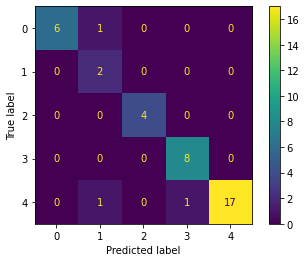

In [ ]:
# tuning_parameter
logistic_regression_model = LogisticRegression(max_iter = 100, penalty = 'l2', solver = 'newton-cg')
kfold = model_selection.KFold(n_splits=10)
cv = model_selection.cross_val_score(logistic_regression_model, X_train_scalar, y_train, cv=kfold)
cv_mean = cv.mean()
cv_std = cv.std()
print('mean =',cv_mean)
print('std =',cv_std)
logistic_regression_model.fit(X_train_scalar, y_train)
y_pred_model =logistic_regression_model.predict(X_test_scalar)
print('accuracy_score = ',accuracy_score(y_test, y_pred_model))
print(classification_report(y_test, y_pred_model))
plot_confusion_matrix(logistic_regression_model, X_test_scalar, y_test)
plt.show()

# DecisionTreeClassifier

mean = 0.99375
std = 0.01875
accuracy_score =  0.975
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.93      0.97      0.94        40
weighted avg       0.98      0.97      0.98        40



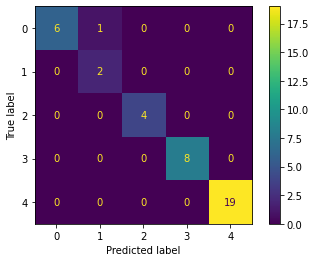

In [ ]:
# default regression
decision_tree_classifier_model = DecisionTreeClassifier()
kfold = model_selection.KFold(n_splits=10)
cv = model_selection.cross_val_score(decision_tree_classifier_model, X_train_scalar, y_train, cv=kfold)
cv_mean = cv.mean()
cv_std = cv.std()
print('mean =',cv_mean)
print('std =',cv_std)
decision_tree_classifier_model.fit(X_train_scalar, y_train)
y_pred_model =decision_tree_classifier_model.predict(X_test_scalar)
print('accuracy_score = ',accuracy_score(y_test, y_pred_model))
print(classification_report(y_test, y_pred_model))
plot_confusion_matrix(decision_tree_classifier_model, X_test_scalar, y_test)
plt.show()

In [ ]:
# find_best_parameter
decision_tree_classifier_model = DecisionTreeClassifier()
decision_tree_classifier_parameter = {
    'max_depth': [3,5,10,None],
    'splitter': ["best","random"],
    'criterion': ["gini", "entropy"],
}

clf = GridSearchCV(decision_tree_classifier_model, decision_tree_classifier_parameter)
clf.fit(X_train_scalar, y_train)
print("\nbest_score = ",clf.best_score_)
print("best_params = ",clf.best_params_)


best_score =  0.99375
best_params =  {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


mean = 0.99375
std = 0.01875
accuracy_score =  0.975
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.93      0.97      0.94        40
weighted avg       0.98      0.97      0.98        40



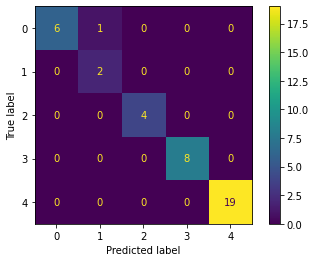

In [ ]:
# tuning_parameter
decision_tree_classifier_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, splitter = 'best')
kfold = model_selection.KFold(n_splits=10)
cv = model_selection.cross_val_score(decision_tree_classifier_model, X_train_scalar, y_train, cv=kfold)
cv_mean = cv.mean()
cv_std = cv.std()
print('mean =',cv_mean)
print('std =',cv_std)
decision_tree_classifier_model.fit(X_train_scalar, y_train)
y_pred_model =decision_tree_classifier_model.predict(X_test_scalar)
print('accuracy_score = ',accuracy_score(y_test, y_pred_model))
print(classification_report(y_test, y_pred_model))
plot_confusion_matrix(decision_tree_classifier_model, X_test_scalar, y_test)
plt.show()

# Random Forest

mean = 0.99375
std = 0.01875
accuracy_score =  0.975
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.93      0.97      0.94        40
weighted avg       0.98      0.97      0.98        40



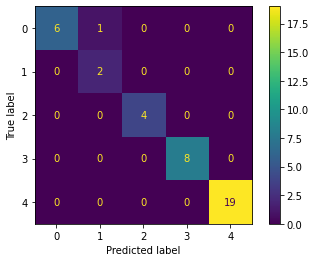

In [ ]:
# default regression
random_forest_classifier_model = RandomForestClassifier()
kfold = model_selection.KFold(n_splits=10)
cv = model_selection.cross_val_score(random_forest_classifier_model, X_train_scalar, y_train, cv=kfold)
cv_mean = cv.mean()
cv_std = cv.std()
print('mean =',cv_mean)
print('std =',cv_std)
random_forest_classifier_model.fit(X_train_scalar, y_train)
y_pred_model =random_forest_classifier_model.predict(X_test_scalar)
print('accuracy_score = ',accuracy_score(y_test, y_pred_model))
print(classification_report(y_test, y_pred_model))
plot_confusion_matrix(random_forest_classifier_model, X_test_scalar, y_test)
plt.show()

In [ ]:
# find_best_parameter
random_forest_classifier_model = RandomForestClassifier()
random_forest_classifier_parameter = {
    'n_estimators': [200,600,1000,1400],
    'bootstrap': [True, False],
    'max_depth' : [3,6,None],
}

clf = GridSearchCV(random_forest_classifier_model, random_forest_classifier_parameter)
clf.fit(X_train_scalar, y_train)
print("\nbest_score = ",clf.best_score_)
print("best_params = ",clf.best_params_)


best_score =  0.99375
best_params =  {'bootstrap': True, 'max_depth': 3, 'n_estimators': 200}


mean = 0.9620833333333334
std = 0.04172703959464813
accuracy_score =  0.975
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.93      0.97      0.94        40
weighted avg       0.98      0.97      0.98        40



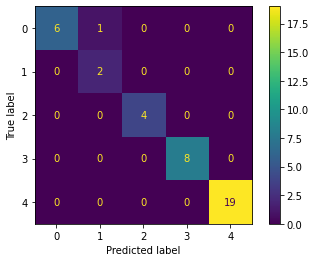

In [ ]:
# tuning_parameter
random_forest_classifier_model = RandomForestClassifier(n_estimators = 200, bootstrap = True, max_depth = 3)
kfold = model_selection.KFold(n_splits=10)
cv = model_selection.cross_val_score(random_forest_classifier_model, X_train_scalar, y_train, cv=kfold)
cv_mean = cv.mean()
cv_std = cv.std()
print('mean =',cv_mean)
print('std =',cv_std)
random_forest_classifier_model.fit(X_train_scalar, y_train)
y_pred_model =random_forest_classifier_model.predict(X_test_scalar)
print('accuracy_score = ',accuracy_score(y_test, y_pred_model))
print(classification_report(y_test, y_pred_model))
plot_confusion_matrix(random_forest_classifier_model, X_test_scalar, y_test)
plt.show()

mean = 0.9625
std = 0.0637377439199098
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        19

    accuracy                           0.97        40
   macro avg       0.93      0.97      0.94        40
weighted avg       0.98      0.97      0.98        40



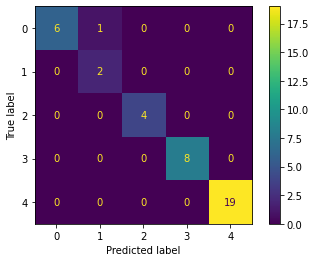

In [ ]:
# best model is random forest

model = RandomForestClassifier(n_estimators = 200, bootstrap = True, max_depth = 3)
model.fit(X_train_scalar, y_train)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold)
print('mean =',scores.mean())
print('std =',scores.std())
print(classification_report(y_test, model.predict(X_test_scalar)))
plot_confusion_matrix(model, X_test_scalar, y_test)

In [ ]:
# feature important

In [ ]:
# Predict all data in file

In [ ]:
# Export Data